<a href="https://www.kaggle.com/code/carolinariddick/exploring-football-shot-patterns?scriptVersionId=273095368" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Exploring Football Shot Patterns: A Data-Driven Analysis

#### This notebook presents an exploratory data analysis of football shooting behaviour using publicly available StatsBomb data. The aim is to visualise and interpret shot patterns, identifying spatial and statistical trends that contribute to goal-scoring performance.

#### We analyse the spatial distribution of shots, their outcomes, and contextual variables such as shot distance, angle, and player involvement. Through a combination of data preprocessing, visual analytics, and statistical insights, the notebook highlights how data-driven methods can be applied to understand efficiency and decision-making in football.

#### This work demonstrates a practical approach to sports analytics, integrating data science techniques with domain knowledge to generate meaningful insights into on-field performance.

In [1]:
pip install statsbomb --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mplsoccer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.5/88.5 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsbombpy --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.7/70.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 1.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.12.0 which is incompatible.
langchain 0.3.12 requires async-timeout<5.0.0,>=4.0.0; python_version < "3.11", but you have async-timeout 5.0.1 which is incompatible.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import libraries and the pitch
import pandas as pd
import numpy as np
import statsbomb as statb
from statsbombpy import sb
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
free_competitions = sb.competitions()
free_competitions

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-09-28T20:46:38.893391,2025-07-06T04:26:07.636270,2025-07-06T04:26:07.636270,2024-09-28T20:46:38.893391
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-09-28T01:57:35.846538,None,None,2024-09-28T01:57:35.846538
3,16,4,Europe,Champions League,male,False,False,2018/2019,2025-05-08T15:10:50.835274,2021-06-13T16:17:31.694,None,2025-05-08T15:10:50.835274
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,315,Europe,UEFA Women's Euro,female,False,True,2025,2025-07-28T14:19:20.467348,2025-07-29T16:03:07.355174,2025-07-29T16:03:07.355174,2025-07-28T14:19:20.467348
72,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
73,72,107,International,Women's World Cup,female,False,True,2023,2025-07-14T10:07:06.620906,2025-07-14T10:10:27.224586,2025-07-14T10:10:27.224586,2025-07-14T10:07:06.620906


In [6]:
womens_world_cup = sb.matches(competition_id=72, season_id=30)
womens_world_cup.head(4)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,22949,2019-06-12,18:00:00.000,International - Women's World Cup,2019,Germany Women's,Spain Women's,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Stade du Hainaut,Kateryna Monzul,Martina Voss-Tecklenburg,Jorge Vilda,1.1.0,2,2
1,22943,2019-06-11,21:00:00.000,International - Women's World Cup,2019,United States Women's,Thailand Women's,13,0,available,...,2021-06-13T16:17:31.694,1,Regular Season,Stade Auguste-Delaune II,NaN,Jillian Ellis,Nuengrutai Srathongvian,1.1.0,2,2
2,22944,2019-06-11,18:00:00.000,International - Women's World Cup,2019,Chile Women's,Sweden Women's,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Roazhon Park,Lucila Venegas Montes,José Antonio Letelier Henríquez,Peter Gerhardsson,1.1.0,2,2
3,22961,2019-06-14,15:00:00.000,International - Women's World Cup,2019,Japan Women's,Scotland Women's,2,1,available,...,2021-06-13T16:17:31.694,2,Regular Season,Roazhon Park,NaN,Asako Takemoto Takakura,"Michelle ""Shelley"" Kerr",1.1.0,2,2


In [7]:
us_thai_game = statb.Events(event_id='22943')
us_thai_game

Events data for ID: 22943

In [8]:
shoot_df = us_thai_game.get_dataframe(event_type='shot').tail(5)
# shoot_df

/usr/local/lib/python3.10/dist-packages/statsbomb/parser.py:86: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[name_cols] = df[name_cols].applymap(get_event_name)


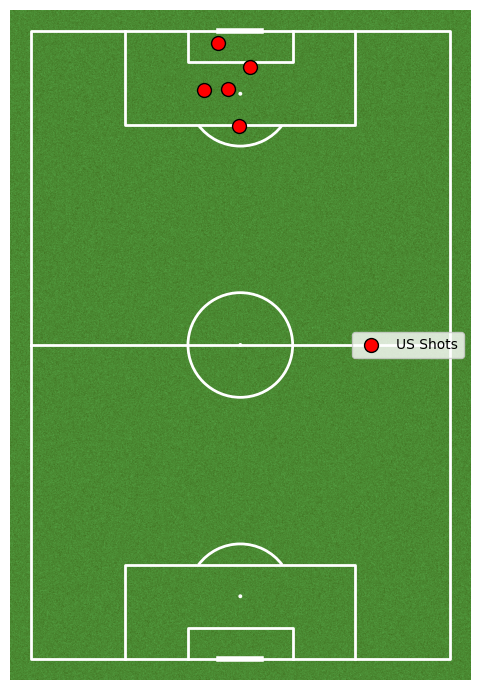

In [9]:
# Create the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

# Filter by US shots
us_shots = shoot_df[shoot_df['possession_team'] == "United States Women's"]

pitch.scatter(us_shots['start_location_x'], us_shots['start_location_y'], 
              ax=ax, color='red', label='US Shots', s=100, edgecolors='black')

plt.legend()
plt.show()

### SECTION 1: 
#### Graphs using normalized data (no need to convert)


In [10]:
# Create a normalized version of X and Y (0-1 scale)

shoot_df['norm_x'] = (shoot_df['start_location_x'] - shoot_df['start_location_x'].min()) / \
                     (shoot_df['start_location_x'].max() - shoot_df['start_location_x'].min())

shoot_df['norm_y'] = (shoot_df['start_location_y'] - shoot_df['start_location_y'].min()) / \
                     (shoot_df['start_location_y'].max() - shoot_df['start_location_y'].min())


### Scatter plot of shots for US Women's team


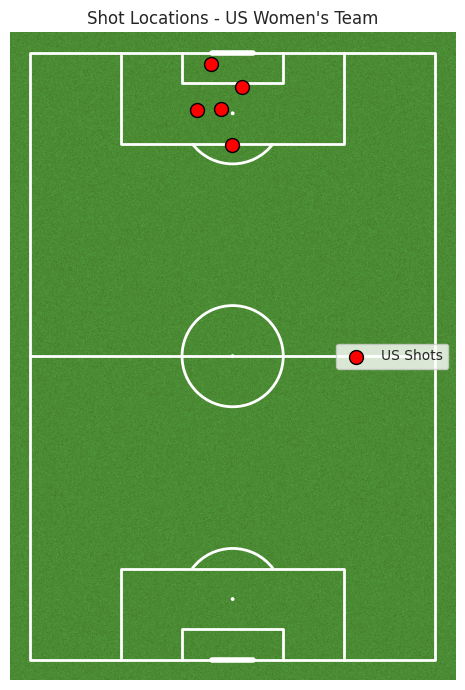

In [11]:
sns.set_style("whitegrid")

pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))
us_shots = shoot_df[shoot_df['possession_team'] == "United States Women's"]
pitch.scatter(us_shots['start_location_x'], us_shots['start_location_y'], 
              ax=ax, color='red', label='US Shots', s=100, edgecolors='black')
plt.legend()
plt.title("Shot Locations - US Women's Team")
plt.show()

### Shot density heatmap for US Women's Team

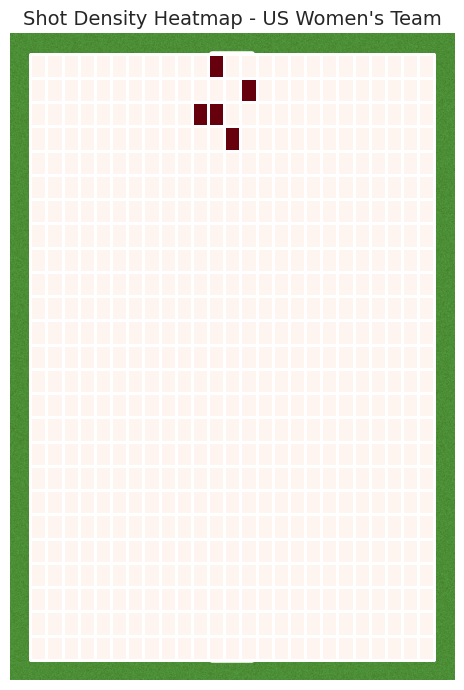

In [12]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 7))

bin_stat = pitch.bin_statistic(
    us_shots['start_location_x'], 
    us_shots['start_location_y'], 
    statistic='count', 
    bins=(25, 25)
)

pitch.heatmap(bin_stat, ax=ax, cmap='Reds', edgecolors='white')
plt.title("Shot Density Heatmap - US Women's Team", fontsize=14)
plt.show()


### Shot outcomes

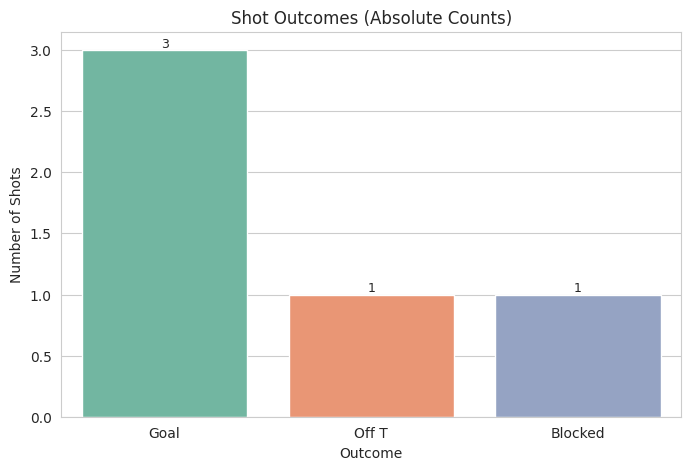

In [13]:
plt.figure(figsize=(8,5))
order = shoot_df['outcome'].value_counts().index
ax = sns.countplot(x='outcome', data=shoot_df, palette='Set2', order=order)

plt.title('Shot Outcomes (Absolute Counts)')
plt.xlabel('Outcome')
plt.ylabel('Number of Shots')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.show()


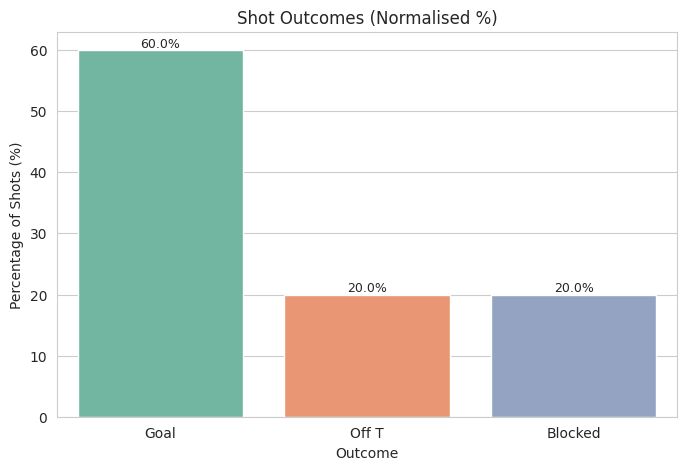

In [14]:
# Calculare normalized distribution
outcome_counts = shoot_df['outcome'].value_counts(normalize=True) * 100
outcome_df = outcome_counts.reset_index()
outcome_df.columns = ['Outcome', 'Percentage']

plt.figure(figsize=(8,5))
sns.barplot(x='Outcome', y='Percentage', data=outcome_df, palette='Set2')

plt.title('Shot Outcomes (Normalised %)')
plt.xlabel('Outcome')
plt.ylabel('Percentage of Shots (%)')

# Show percetange values
for i, v in enumerate(outcome_df['Percentage']):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontsize=9)

plt.show()


### Shots by type

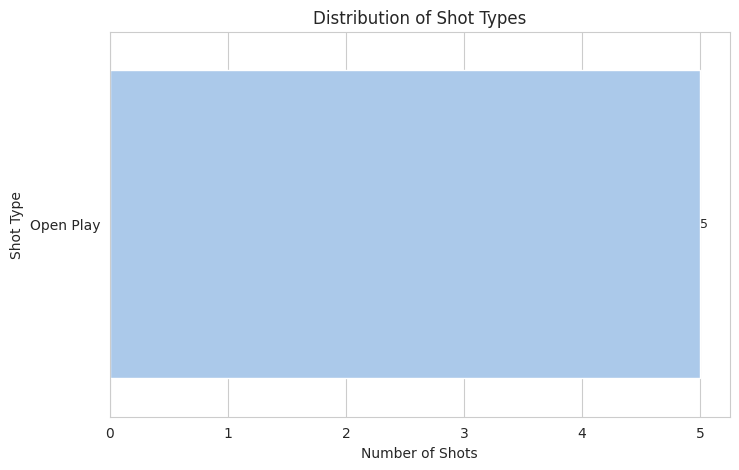

In [15]:
plt.figure(figsize=(8,5))
order = shoot_df['type'].value_counts().index
ax = sns.countplot(
    y='type',
    data=shoot_df,
    order=order,
    palette='pastel'
)

plt.title('Distribution of Shot Types')
plt.xlabel('Number of Shots')
plt.ylabel('Shot Type')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9)

plt.show()


### Shots by technique

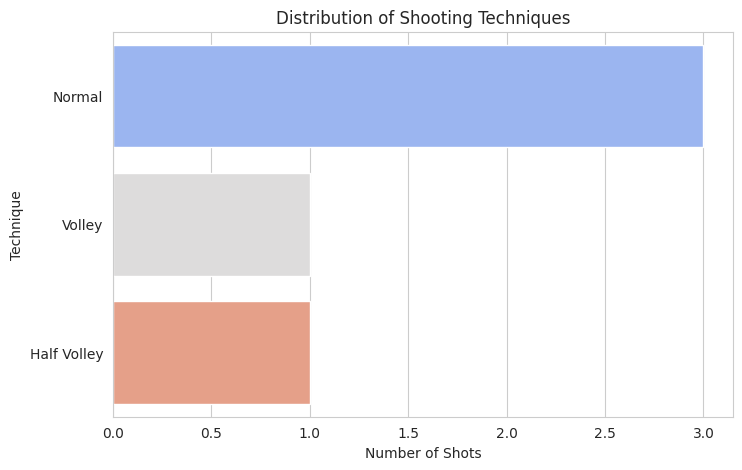

In [16]:

plt.figure(figsize=(8,5))
sns.countplot(y='technique', data=shoot_df, order=shoot_df['technique'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Shooting Techniques')
plt.xlabel('Number of Shots')
plt.ylabel('Technique')
plt.show()


### SECTION 2: 
#### Graphs requiring conversion / distance calculation


In the dataset, the `start_location_x` column represents the horizontal position of the shot on the pitch.  
However, the values are not measured from the very start of the pitch (0 m), but only cover the **attacking zone near the opponent's goal**, ranging roughly from 102 to 118 meters in our dataset.

To make the chart intuitive:

1. I calculate the **distance to the goal** as:

   `distance_to_goal = goal_x - start_location_x`
   
   where `goal_x = 120` m, representing the position of the opponent's goal.

2. We plot a histogram showing the **number of shots at each distance** to the goal.  

3. The y-axis is set to **integers**, so each bar represents an exact count of shots at that distance interval.

This way, the chart clearly shows how far players are shooting from the goal, making the data more interpretable.


In [17]:
# Calculate distance to goal (goal at X=120)
goal_x = 120
shoot_df['distance_to_goal'] = goal_x - shoot_df['start_location_x']


### Histogram of distances to goal


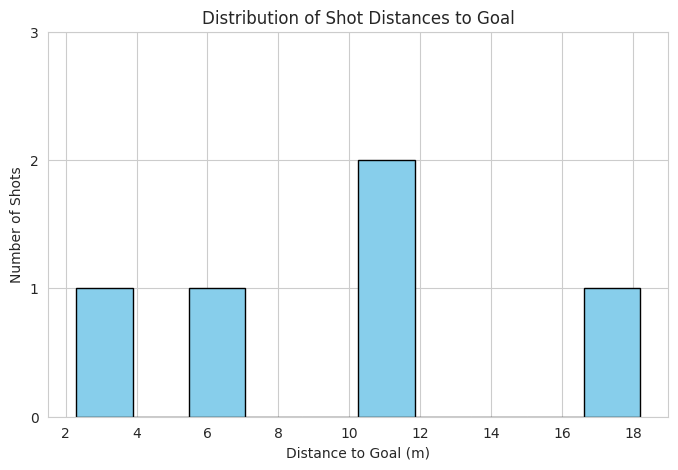

In [18]:
plt.figure(figsize=(8,5))
counts, bins, patches = plt.hist(shoot_df['distance_to_goal'], 
                                 bins=10, 
                                 color='skyblue', 
                                 edgecolor='black')

plt.yticks(np.arange(0, max(counts) + 2, 1))
plt.xlabel('Distance to Goal (m)')
plt.ylabel('Number of Shots')
plt.title('Distribution of Shot Distances to Goal')
plt.show()


### Histogram of Expected Goals (xG) with outcome differentiation


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


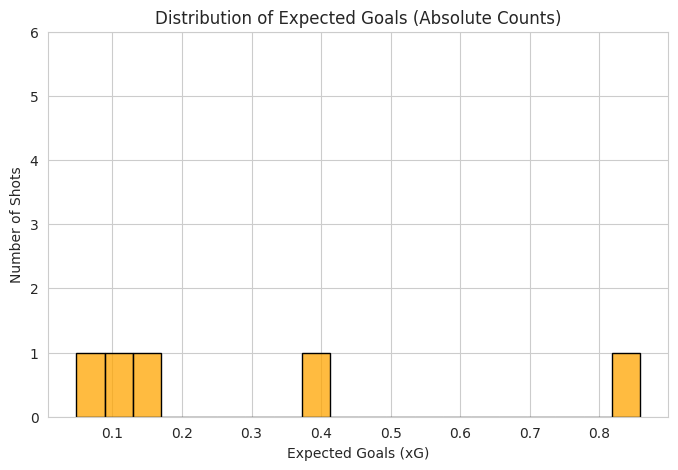

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=shoot_df,
    x='statsbomb_xg',
    bins=20,
    color='orange',
    edgecolor='black',
    stat='count'
)

plt.yticks(np.arange(0, shoot_df.shape[0]+2, 1))
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Number of Shots')
plt.title('Distribution of Expected Goals (Absolute Counts)')
plt.show()


### Boxplot of xG by shot outcome

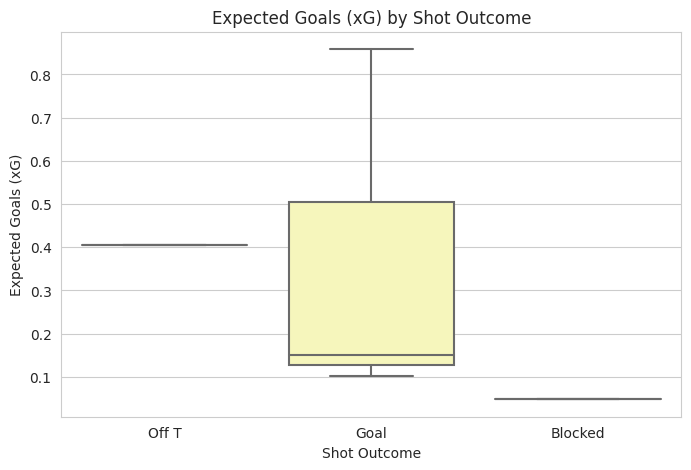

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='outcome', y='statsbomb_xg', data=shoot_df, palette='Set3')
plt.xlabel('Shot Outcome')
plt.ylabel('Expected Goals (xG)')
plt.title('Expected Goals (xG) by Shot Outcome')
plt.show()